In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as ss

from sklearn.model_selection import train_test_split, cross_val_score

import keras.backend as K
from keras import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, RMSprop

Using TensorFlow backend.


In [31]:
'''Wine data set'''

wine = pd.read_csv('../data/wines.csv')
wine.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
y_cat = pd.get_dummies(wine['Class'])

In [5]:
y_cat.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [33]:
X = wine.drop('Class', axis=1)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


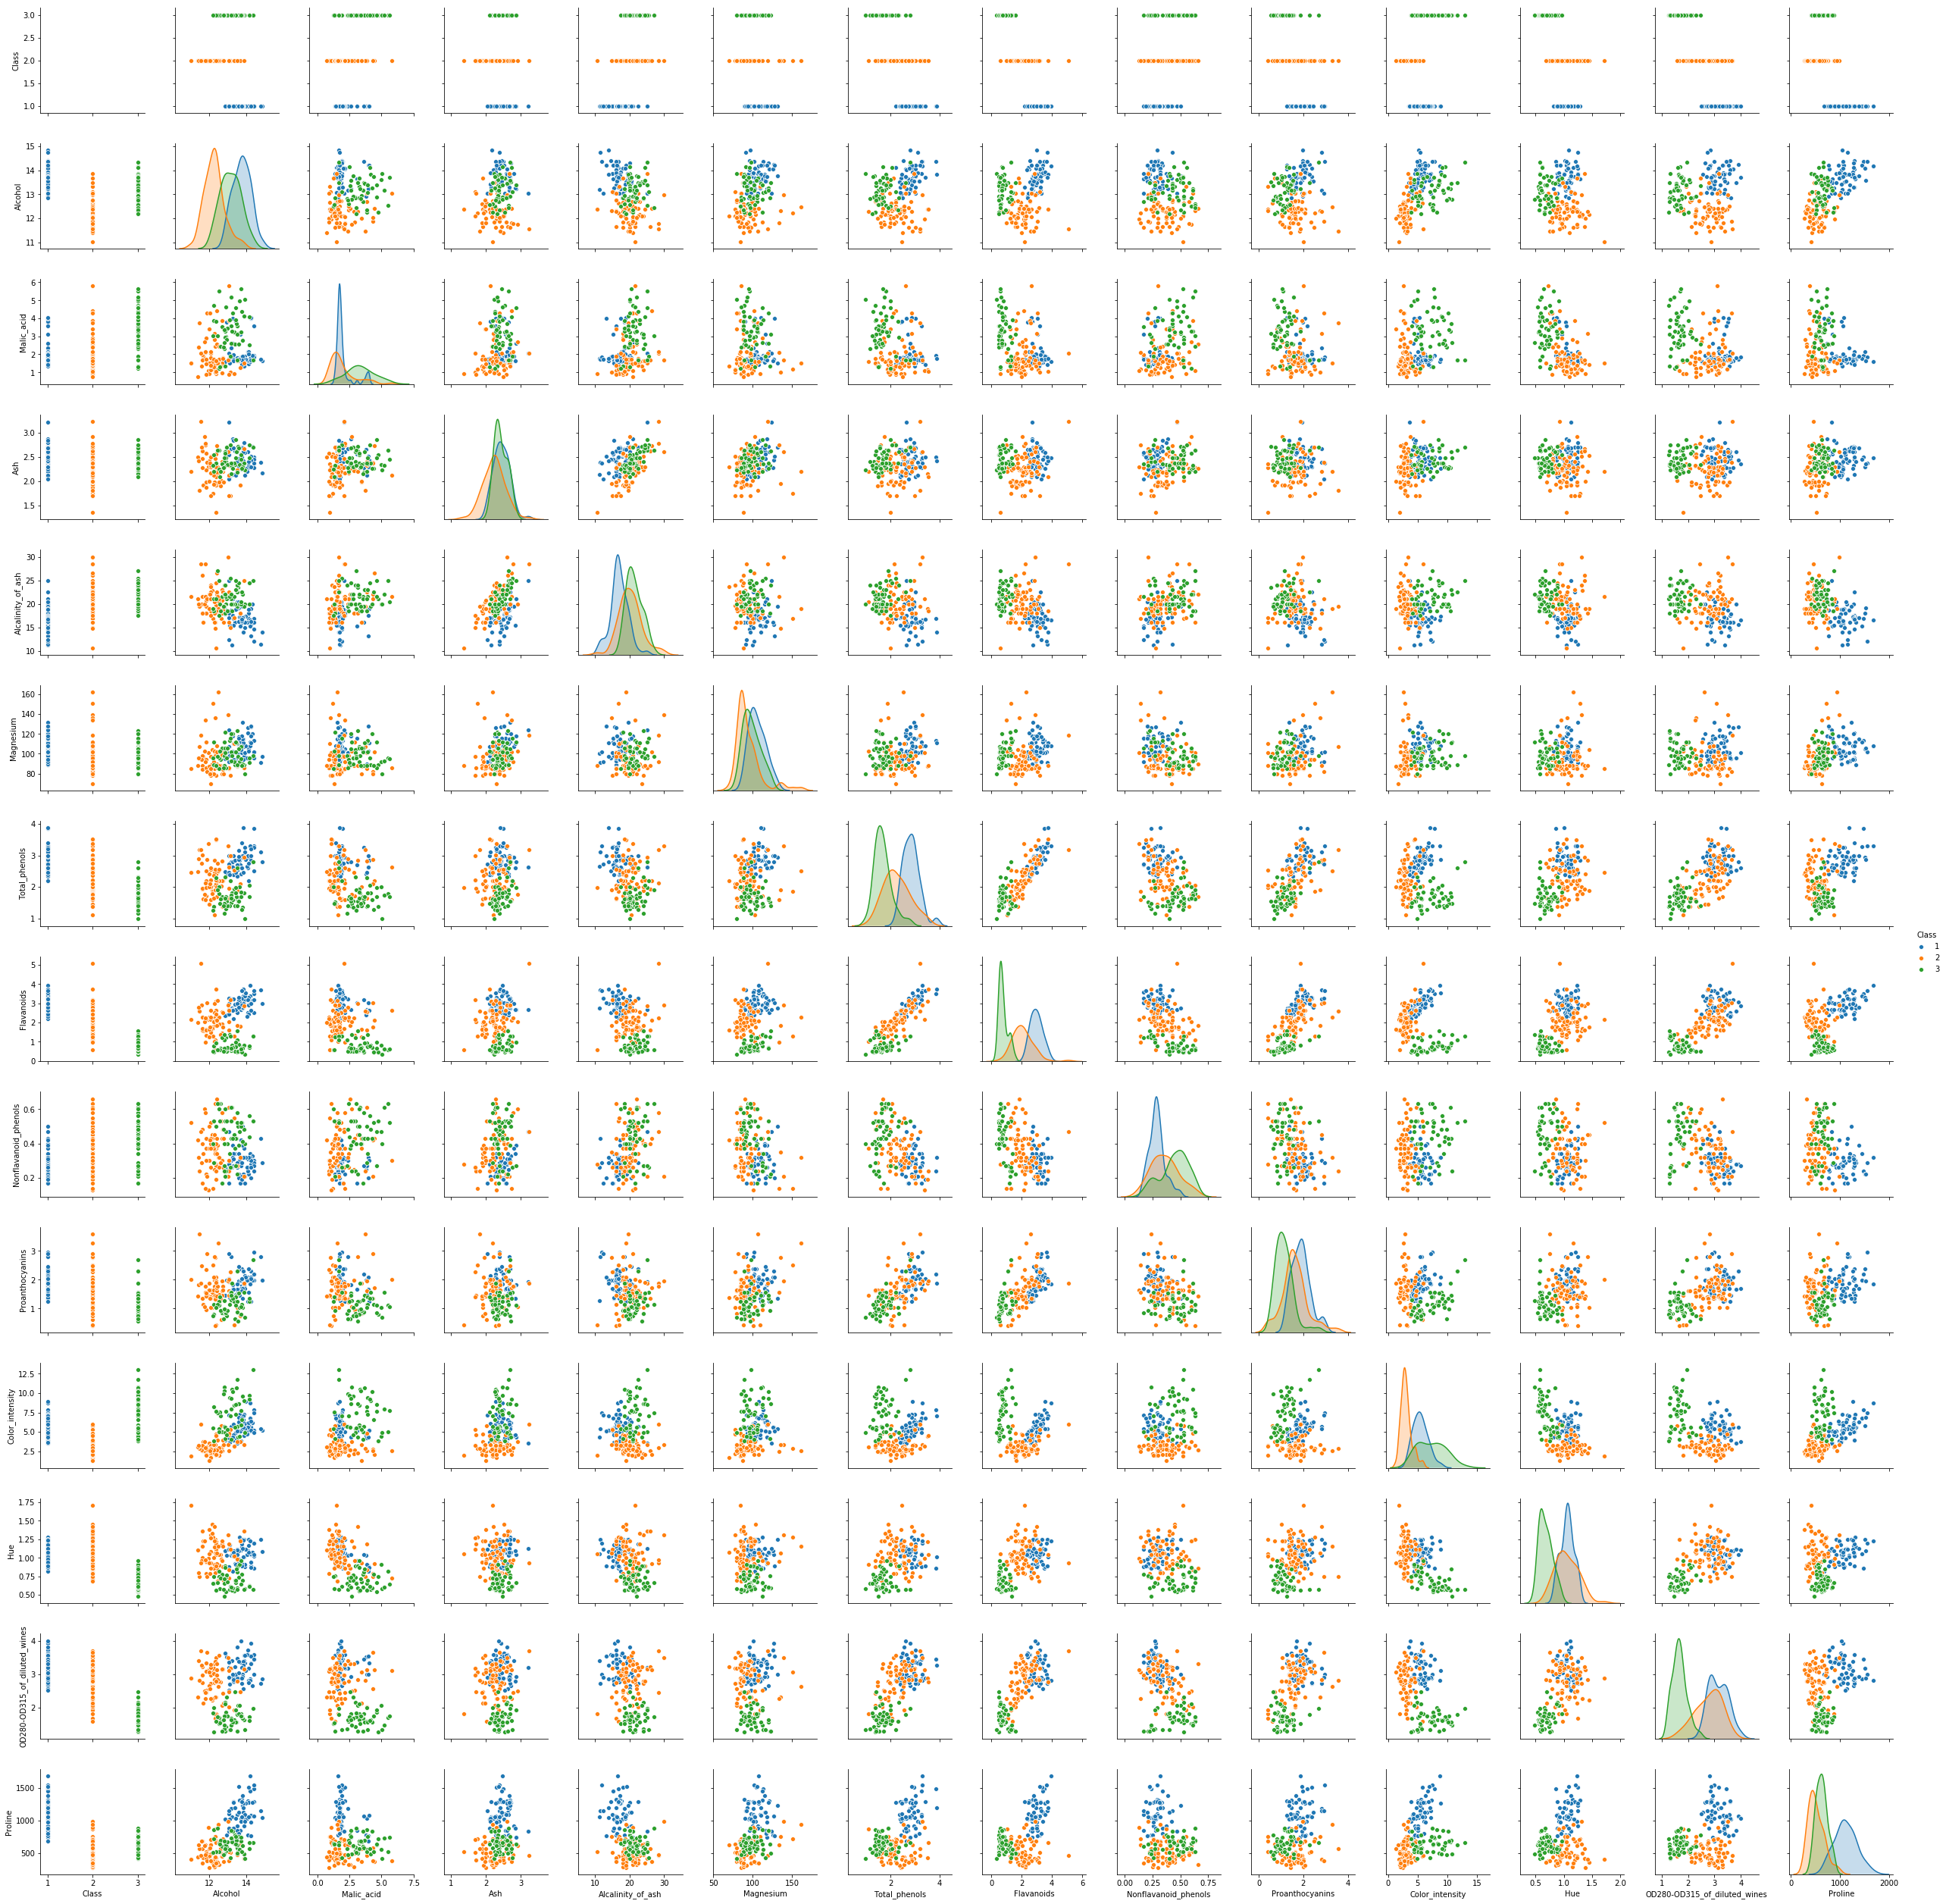

In [9]:
# can draw even the column is dropped?

ss.pairplot(wine,hue='Class')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()

In [61]:
# scaling the data

X = scaler.fit_transform(X)
X_train,  X_test,y_train, y_test = train_test_split(X, y_cat, test_size=0.2)


In [39]:
'''Wine quality predictor with DNN'''

K.clear_session()
model = Sequential()
model.add(Dense(5, input_dim=13, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.1), 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, batch_size = 10, epochs=10, validation_split=0.1, verbose=0)

In [62]:
'''acheived 100 percent accuracy'''

model.evaluate(X_test, y_test)

36/36 [==============================] - 0s 468us/step


[0.0007564742635521623, 1.0]

# Auto encoding

In [12]:
# The tanh is better estimator for the auto encoding

K.clear_session()
model = Sequential()
model.add(Dense(8, input_dim=13, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(5,  kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3,  kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))

          
model.compile(RMSprop(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X,y_cat.values, batch_size = 16, epochs=20, validation_split=0.2, verbose=0)

In [19]:
inp = model.layers[0].input
out = model.layers[2].output

In [22]:
'''estimating the learned features efficiency from inner layers'''

feat_func = K.function([inp], [out])
features = feat_func([X])[0]
features.shape

(178, 3)

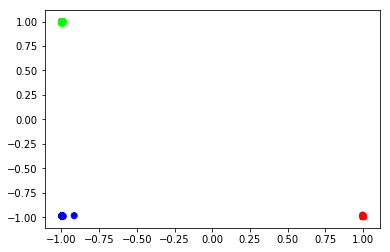

In [25]:
plt.scatter(features[:,0], features[:,2], c=y_cat)

# Call Backs

In [52]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [59]:
'''setting different types of efficiency booster call backs'''

check  = ModelCheckpoint(filepath='./new', save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=1,mode='auto')
tensorb= TensorBoard(log_dir='./visualize/')

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat.values, test_size=0.2)

In [61]:
'''training the model'''

K.clear_session()

model = Sequential()
model.add(Dense(8, kernel_initializer='he_normal', input_dim=13,activation='tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y_cat, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[check, early, tensorb])

Train on 178 samples, validate on 36 samples
Epoch 1/20
178/178 [==============================] - 0s 1ms/step - loss: 0.6965 - acc: 0.7753 - val_loss: 0.3403 - val_acc: 1.0000
Epoch 2/20
178/178 [==============================] - 0s 68us/step - loss: 0.2928 - acc: 0.9551 - val_loss: 0.3080 - val_acc: 0.9444
Epoch 3/20
178/178 [==============================] - 0s 102us/step - loss: 0.1871 - acc: 0.9831 - val_loss: 0.1116 - val_acc: 1.0000
Epoch 4/20
178/178 [==============================] - 0s 116us/step - loss: 0.1371 - acc: 0.9719 - val_loss: 0.0797 - val_acc: 1.0000
Epoch 5/20
178/178 [==============================] - 0s 81us/step - loss: 0.0890 - acc: 0.9888 - val_loss: 0.0572 - val_acc: 1.0000
Epoch 6/20
178/178 [==============================] - 0s 85us/step - loss: 0.0498 - acc: 1.0000 - val_loss: 0.0408 - val_acc: 1.0000
Epoch 7/20
178/178 [==============================] - 0s 108us/step - loss: 0.0359 - acc: 1.0000 - val_loss: 0.0296 - val_acc: 1.0000
Epoch 8/20
178/178 [==